<a href="https://colab.research.google.com/github/TNK443/RecPadroes/blob/main/03_Generalizacao_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avaliando a Generalização de Algoritmos**

1) Escolha uma base de classificação e compare os classificadores Logistic Regression e KNN do scikit-learn.

1.1) Use pelo menos duas formas de avaliação e as repita pelo menos 10 vezes.

1.2) Calcule a média das repetições de cada avaliação.



## **[COFING]**

In [1]:
# ================================================================================
#                               BIBLIOTECAS
# ================================================================================
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import csv

# BASE IMPORTADA
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_pairs
from sklearn.datasets import fetch_covtype

# METRICAS
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

# PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# PIPELINE
from sklearn.pipeline import Pipeline

# GRIDSEARCH
from sklearn.model_selection import GridSearchCV

# CLASSIFICADORES
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# ================================================================================

## **1) Escolha uma base de classificação...**
*(5 BASES para escolher: 4 SKLearn e 1 UCI)*

*(Para alternar/escolher as bases SKLearn, deve-se tirar um do comentário e colocar o atual como comentado.)*

### BASE SCIKIT-LEARN

In [2]:
# ================================================================================
#                            CARREGANDO BASE SCIKIT-LEARN
# ================================================================================
# --------------------------------------------------------------------------------
# baseSKL = load_wine()
baseSKL = load_breast_cancer()
# baseSKL = fetch_covtype()
# baseSKL = fetch_lfw_pairs()

clear_output()

Xb1, yb1 = baseSKL.data, baseSKL.target

# print()
print('=' * 100)

print('-' * 80)
print("[SKLEARN.DATASETS]")
print("(base classification)")
print()
print("KEYS:", baseSKL.keys(), "\n")
print("X.shape:", Xb1.shape, " || ", "y.shape:", yb1.shape, " || ", "Classe(set(y)):", set(yb1))
print()
print('-' * 80)

print('=' * 100)
# --------------------------------------------------------------------------------

--------------------------------------------------------------------------------
[SKLEARN.DATASETS]
(base classification)

KEYS: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 

X.shape: (569, 30)  ||  y.shape: (569,)  ||  Classe(set(y)): {0, 1}

--------------------------------------------------------------------------------


In [3]:
print(baseSKL.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

No handles with labels found to put in legend.


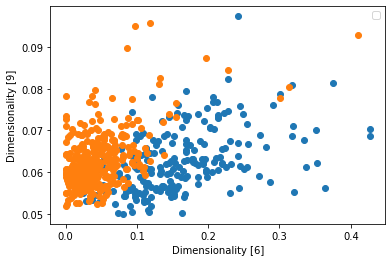

In [4]:
# --------------------------------------------------------------------------------
i, j = 6, 9

plt.xlabel(f"Dimensionality [{i}]")
# plt.xlabel(f"{i}: {baseSKL.feature_names[i]}")

plt.ylabel(f"Dimensionality [{j}]")
# plt.ylabel(f"{j}: {baseSKL.feature_names[j]}")

for k in set(yb1):
    plt.plot(Xb1[:,i][yb1==k], Xb1[:,j][yb1==k], "o")
    # plt.plot(Xb1[:,i][yb1==k], Xb1[:,j][yb1==k], "o", label=f"{baseSKL.target_names[k]}")

plt.legend()
plt.show()
# --------------------------------------------------------------------------------

In [5]:
# --------------------------------------------------------------------------------
# ================================================================================

### BASE HEART BISEASE UCI

In [6]:
# ================================================================================
#                            CARREGANDO BASE HEART BISEASE UCI
# ================================================================================
# Base dados Heart Disease UCI: https://www.kaggle.com/ronitf/heart-disease-uci
# --------------------------------------------------------------------------------
#                         Carrega e Inicializa os DADOS necessários.
# --------------------------------------------------------------------------------

!rm -r *.*
!rm -r sample_data
!rm -r DataSet

# --------------------------------------------------------------------------------
!git clone https://github.com/TNK443/DataSet/
!rm -r /content/DataSet/README.md
# --------------------------------------------------------------------------------

clear_output()

print('ARQUIVOS CARREGADOS COM SUCESSO.')

# --------------------------------------------------------------------------------

ARQUIVOS CARREGADOS COM SUCESSO.


In [7]:
# ================================================================================
#---------------------------------------------------------------------------------
# PASSO 1. Separar os dados em uma matriz de features (dados de entrada) e um vetor
#          coluna com as classes (última coluna – “target” – do arquivo csv).
#
targetList = []
featuresList = []
featuresListMAX = []
featuresListMIN = []

with open ('/content/DataSet/heart.csv', 'r') as heart:
  dataCSV = csv.reader(heart)

  next(dataCSV)
  for line in dataCSV:
      featuresList.append(line[:13])
      targetList.append(line[13:])

# Transforma a targetList em um Vetor/Lista de Interos
aux = np.array(targetList).reshape(-1)
targetList = list(map(int, aux))

#---------------------------------------------------------------------------------
# PASSO 2. Normalizar a matriz de features de forma que os valores das colunas
#          estejam no intervalo [0, 1]. Essa transformação é importante para que a
#          contribuição de todas as características seja aproximadamente a mesma.
#          Além disso, alguns classificadores como as redes neurais funcionam melhor 
#          com dados neste intervalo.
#
# Inicializa as Listas MAX/MIN com a primeira linha.
featuresListMIN = (list(map(float, featuresList[0])))
featuresListMAX = (list(map(float, featuresList[0])))

# Transforma a Matriz de Features em um Vetor/Lista.
aux = np.array(featuresList).reshape(-1)
aux = list(map(float, aux))

# Pecorre todo a Lista e identifica o MAX e MIN de cada Coluna.
count = 0
for i in aux:
    if (featuresListMAX[(count % 13)] < i): featuresListMAX[(count % 13)] = i
    if (featuresListMIN[(count % 13)] > i): featuresListMIN[(count % 13)] = i
    count += 1

# Ajusta o MAX de acordo com o MIN.
for i in range(13):
  featuresListMAX[i] = featuresListMAX[i] - featuresListMIN[i] 

# print(featuresListMIN)
# print(featuresListMAX)

# Pecorre todo a Lista e para realizar o tratamento com o MIN e MAX.
count = 0
auxList = []
featuresListNORM = []
for i in aux:
  auxList.append((i - featuresListMIN[count])/featuresListMAX[count])
  count += 1
  if (count == 13):
      featuresListNORM.append(auxList)
      auxList = []
      count = 0

# Cria um Index para Controle
index = list(range(len(featuresListNORM)))
#---------------------------------------------------------------------------------

In [8]:
#---------------------------------------------------------------------------------
Xb2, yb2 = np.array(featuresListNORM), np.array(targetList)

# print()
print('=' * 100)

print('-' * 80)
print("[BASE HEART BISEASE UCI]")
print()
print("X.shape:", Xb2.shape, " || ", "y.shape:", yb2.shape, " || ", "Classe(set(y)):", set(yb2))
print()
print('-' * 80)

print('=' * 100)
# --------------------------------------------------------------------------------

--------------------------------------------------------------------------------
[BASE HEART BISEASE UCI]

X.shape: (303, 13)  ||  y.shape: (303,)  ||  Classe(set(y)): {0, 1}

--------------------------------------------------------------------------------


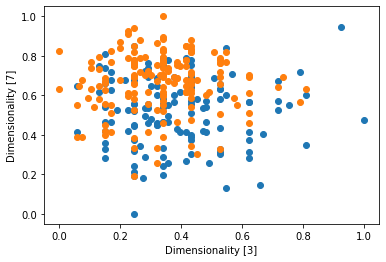

In [9]:
# --------------------------------------------------------------------------------
i, j = 3, 7

plt.xlabel(f"Dimensionality [{i}]")
plt.ylabel(f"Dimensionality [{j}]")

for k in set(yb2):
    plt.plot(Xb2[:,i][yb2==k], Xb2[:,j][yb2==k], "o")

plt.show()
# --------------------------------------------------------------------------------

## **...compare os classificadores Logistic Regression e KNN do scikit-learn.**

*(Aqui, deve-se escolher entre a BASE SKLEARN ou UCI para fazer a comparação dos Classificadores.)*

In [10]:
# ================================================================================
#                              SELEÇÃO DA BASE
# ================================================================================

# BASE SCIKIT-LEARN
X, y = Xb1, yb1

# BASE HEART BISEASE UCI
# X, y = Xb2, yb2
# ================================================================================

In [11]:
# ================================================================================
#                       AVALIAÇÃO COM GRIDSEARCH(PIPELINE)
# ================================================================================

#---------------------------------------------------------------------------------
#                              COM PADRONIZAÇÃO
#---------------------------------------------------------------------------------
pipelineLGR_c = Pipeline([
                        ("padronizacao", StandardScaler()),
                        ("lgr", LogisticRegression())
                      ])
parametros = {'lgr__max_iter':[25,50,100]}
modeloLGR = GridSearchCV(pipelineLGR_c, parametros,
                         scoring='neg_mean_squared_error'
                        )


pipelineKNN_c = Pipeline([
                        ("padronizacao", StandardScaler()),
                        ("knn", KNeighborsClassifier())
                      ])
parametros = {'knn__n_neighbors':[3,5,7]}
modeloKNN = GridSearchCV(pipelineKNN_c, parametros,
                         scoring='neg_mean_squared_error'
                        )

# AVALIAÇÃO
scoresLGR_c = cross_validate(modeloLGR, X, y, cv=10,
                           scoring=make_scorer(mean_squared_error, 
                           greater_is_better=False, squared=False)
                          )

scoresKNN_c = cross_validate(modeloKNN, X, y, cv=10,
                           scoring=make_scorer(mean_squared_error, 
                           greater_is_better=False, squared=False)
                          )

AVG_LGR_com_padr = np.mean(scoresLGR_c['test_score'])
AVG_KNN_com_padr = np.mean(scoresKNN_c['test_score'])

clear_output()

#---------------------------------------------------------------------------------
#                               SEM PADRONIZAÇÃO
#---------------------------------------------------------------------------------
pipelineLGR_s = Pipeline([
                          ("lgr", LogisticRegression())
                          ])
parametros = {'lgr__max_iter':[25,50,100]}
modeloLGR = GridSearchCV(pipelineLGR_s, parametros,
                         scoring='neg_mean_squared_error'
                        )


pipelineKNN_s = Pipeline([
                          ("knn", KNeighborsClassifier())
                          ])
parametros = {'knn__n_neighbors':[3,5,7]}
modeloKNN = GridSearchCV(pipelineKNN_s, parametros,
                         scoring='neg_mean_squared_error'
                        )

# AVALIAÇÃO
scoresLGR_s = cross_validate(modeloLGR, X, y, cv=10,
                           scoring=make_scorer(mean_squared_error, 
                           greater_is_better=False, squared=False)
                          )

scoresKNN_s = cross_validate(modeloKNN, X, y, cv=10,
                           scoring=make_scorer(mean_squared_error, 
                           greater_is_better=False, squared=False)
                          )

AVG_LGR_sem_padr = np.mean(scoresLGR_s['test_score'])
AVG_KNN_sem_padr = np.mean(scoresKNN_s['test_score'])


m1GP = AVG_LGR_com_padr*(-1)
m2GP = AVG_KNN_com_padr*(-1)
m3GP = AVG_LGR_sem_padr*(-1)
m4GP = AVG_KNN_sem_padr*(-1)

clear_output()

#---------------------------------------------------------------------------------

In [12]:
#---------------------------------------------------------------------------------
np.set_printoptions(precision=2, linewidth=100)

print("COM PADRÃO:","\n")
print("Scores LGR:", (scoresLGR_c['test_score'])*(-1))
print("Scores KNN:", (scoresKNN_c['test_score'])*(-1))
print()
print("Média LGR = ", m1GP)
print("Média KNN = ", m2GP,"\n")

print()

print("SEM PADRÃO:","\n")
print("Scores LGR:", scoresLGR_s['test_score']*(-1))
print("Scores KNN:", scoresKNN_s['test_score']*(-1))
print()
print("Média LGR = ", m3GP)
print("Média KNN = ", m4GP)
#---------------------------------------------------------------------------------

COM PADRÃO: 

Scores LGR: [0.13 0.13 0.13 0.19 0.13 0.13 0.23 0.   0.   0.13]
Scores KNN: [0.13 0.19 0.26 0.13 0.   0.19 0.23 0.19 0.23 0.27]

Média LGR =  0.12126296956756347
Média KNN =  0.1817857139428582 


SEM PADRÃO: 

Scores LGR: [0.32 0.23 0.23 0.26 0.19 0.19 0.26 0.26 0.19 0.19]
Scores KNN: [0.26 0.37 0.32 0.19 0.23 0.26 0.19 0.26 0.3  0.23]

Média LGR =  0.2328927447695305
Média KNN =  0.2625476103459152


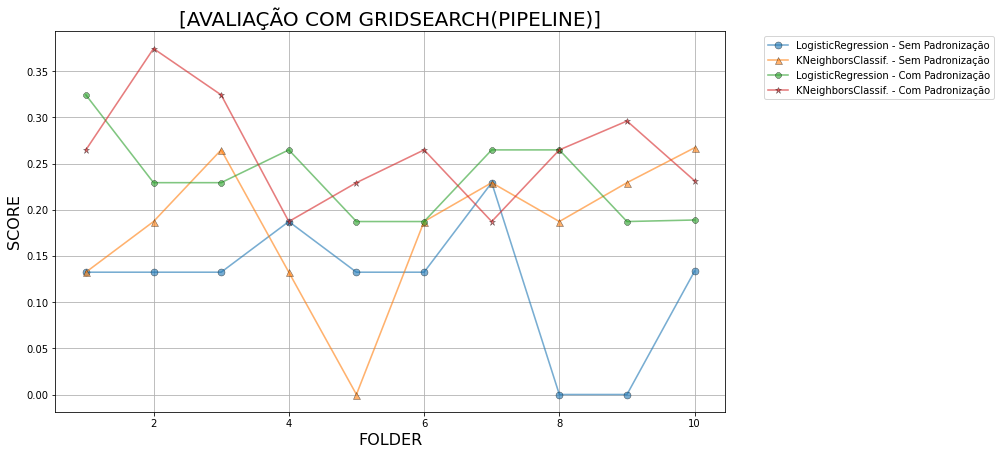

In [13]:
#---------------------------------------------------------------------------------
y0  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x1GP = scoresLGR_c['test_score']*(-1)
x2GP = scoresKNN_c['test_score']*(-1)
x3GP = scoresLGR_s['test_score']*(-1)
x4GP = scoresKNN_s['test_score']*(-1)

plt.figure(figsize=(12,7))
plt.title('[AVALIAÇÃO COM GRIDSEARCH(PIPELINE)]', fontsize=20)
ax = plt.gca()
ax.yaxis.grid(b=True, which='major') #deixa as linhas de grade principais em negrito
ax.xaxis.grid(b=True, which='major') #deixa as linhas de grade principais em negrito
plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("FOLDER", fontsize=16)

plt.plot(y0, x1GP, linewidth=1.6, linestyle='-', label='LogisticRegression - Sem Padronização', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x2GP, linewidth=1.6, linestyle='-', label='KNeighborsClassif. - Sem Padronização', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x3GP, linewidth=1.6, linestyle='-', label='LogisticRegression - Com Padronização', marker='8', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x4GP, linewidth=1.6, linestyle='-', label='KNeighborsClassif. - Com Padronização', marker='*', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()
#---------------------------------------------------------------------------------
# ================================================================================

In [14]:
# ================================================================================
#                         AVALIAÇÃO SEM PIPELINE/GRIDSEARCH
# ================================================================================


#---------------------------------------------------------------------------------
#                                 COM PADRONIZAÇÃO
#---------------------------------------------------------------------------------
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

modeloLGR = LogisticRegression()
modeloLGR.fit(X_new,y)

modeloKNN = KNeighborsClassifier()
modeloKNN.fit(X_new, y)

# AVALIAÇÃO
scoresLGR_c = cross_validate(modeloLGR, X_new, y, cv=10,
                           scoring=make_scorer(mean_squared_error, 
                           greater_is_better=False, squared=False)
                          )

scoresKNN_c = cross_validate(modeloKNN, X_new, y, cv=10,
                           scoring=make_scorer(mean_squared_error, 
                           greater_is_better=False, squared=False)
                          )

AVG_LGR_com_padr = np.mean(scoresLGR_c['test_score'])
AVG_KNN_com_padr = np.mean(scoresKNN_c['test_score'])

clear_output()

#---------------------------------------------------------------------------------
#                                 SEM PADRONIZAÇÃO
#---------------------------------------------------------------------------------
modeloLGR = LogisticRegression()
modeloLGR.fit(X,y)

modeloKNN = KNeighborsClassifier()
modeloKNN.fit(X, y)

# AVALIAÇÃO
scoresLGR_s = cross_validate(modeloLGR, X, y, cv=10,
                           scoring=make_scorer(mean_squared_error, 
                           greater_is_better=False, squared=False)
                          )

scoresKNN_s = cross_validate(modeloKNN, X, y, cv=10,
                           scoring=make_scorer(mean_squared_error, 
                           greater_is_better=False, squared=False)
                          )

AVG_LGR_sem_padr = np.mean(scoresLGR_s['test_score'])
AVG_KNN_sem_padr = np.mean(scoresKNN_s['test_score'])

clear_output()

m1 = AVG_LGR_com_padr*(-1)
m2 = AVG_KNN_com_padr*(-1)
m3 = AVG_LGR_sem_padr*(-1)
m4 = AVG_KNN_sem_padr*(-1)

#---------------------------------------------------------------------------------

In [15]:
#---------------------------------------------------------------------------------
np.set_printoptions(precision=4, linewidth=100)

print("COM PADRÃO:","\n")
print("Scores LGR:", scoresLGR_c['test_score']*(-1))
print("Scores KNN:", scoresKNN_c['test_score']*(-1))
print()
print("Média LGR = ", AVG_LGR_com_padr*(-1))
print("Média KNN = ", AVG_KNN_com_padr*(-1),"\n")

print()

print("SEM PADRÃO:","\n")
print("Scores LGR:", scoresLGR_s['test_score']*(-1))
print("Scores KNN:", scoresKNN_s['test_score']*(-1))
print()
print("Média LGR = ", AVG_LGR_sem_padr*(-1))
print("Média KNN = ", AVG_KNN_sem_padr*(-1),"\n")
#---------------------------------------------------------------------------------

COM PADRÃO: 

Scores LGR: [0.1325 0.1325 0.1325 0.1873 0.1325 0.1325 0.2294 0.     0.     0.1336]
Scores KNN: [0.1325 0.1873 0.2649 0.1325 0.     0.1873 0.2294 0.1873 0.2294 0.1336]

Média LGR =  0.12126296956756347
Média KNN =  0.16842265184723698 


SEM PADRÃO: 

Scores LGR: [0.2962 0.2294 0.2649 0.2649 0.1873 0.1873 0.2649 0.2649 0.1873 0.189 ]
Scores KNN: [0.2962 0.3504 0.3244 0.1873 0.2294 0.2649 0.1873 0.2649 0.2962 0.189 ]

Média LGR =  0.23361497818557733
Média KNN =  0.2590075279879719 



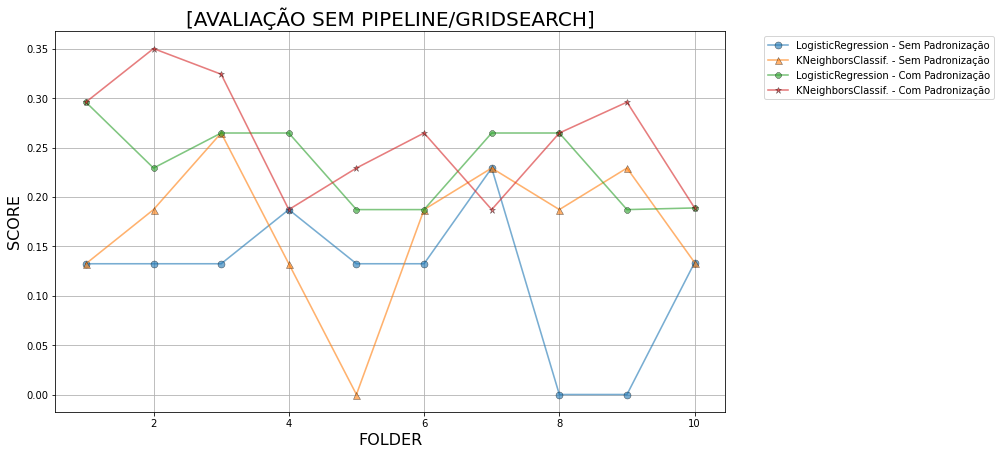

In [16]:
#---------------------------------------------------------------------------------
y0  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x1 = scoresLGR_c['test_score']*(-1)
x2 = scoresKNN_c['test_score']*(-1)
x3 = scoresLGR_s['test_score']*(-1)
x4 = scoresKNN_s['test_score']*(-1)

plt.figure(figsize=(12,7))
plt.title('[AVALIAÇÃO SEM PIPELINE/GRIDSEARCH]', fontsize=20)
ax = plt.gca()
ax.yaxis.grid(b=True, which='major') #deixa as linhas de grade principais em negrito
ax.xaxis.grid(b=True, which='major') #deixa as linhas de grade principais em negrito
plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("FOLDER", fontsize=16)

plt.plot(y0, x1, linewidth=1.6, linestyle='-', label='LogisticRegression - Sem Padronização', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x2, linewidth=1.6, linestyle='-', label='KNeighborsClassif. - Sem Padronização', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x3, linewidth=1.6, linestyle='-', label='LogisticRegression - Com Padronização', marker='8', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x4, linewidth=1.6, linestyle='-', label='KNeighborsClassif. - Com Padronização', marker='*', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)


plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()
#---------------------------------------------------------------------------------

In [17]:
#---------------------------------------------------------------------------------
# ================================================================================

In [18]:
#===============================================================================
#                      TABELA COM SUMARIZAÇÃO DE RESULTADOS
#===============================================================================
import pandas as pd

A = ['LogisticRegression - Sem Padronização', 'KNeighborsClassif. - Sem Padronização', 'LogisticRegression - Com Padronização', 'KNeighborsClassif. - Sem Padronização']
B, C = [],[]


B.append(m1GP)
C.append(m1)

B.append(m2GP)
C.append(m2)

B.append(m3GP)
C.append(m3)

B.append(m4GP)
C.append(m4)

print("===============================================================================")
print("                     TABELA COM SUMARIZAÇÃO DE RESULTADOS                      ")
print("===============================================================================","\n")

df = pd.DataFrame(index=A)
df['MEDIA C/GP'] = B
df['MEDIA S/GP'] = C

df
#---------------------------------------------------------------------------------

                     TABELA COM SUMARIZAÇÃO DE RESULTADOS                      



,MEDIA C/GP,MEDIA S/GP
LogisticRegression - Sem Padronização,0.121263,0.121263
KNeighborsClassif. - Sem Padronização,0.181786,0.168423
LogisticRegression - Com Padronização,0.232893,0.233615
KNeighborsClassif. - Sem Padronização,0.262548,0.259008


In [19]:
#---------------------------------------------------------------------------------
# ================================================================================